In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, Y_train, Y_test=train_test_split(dataset.drop(columns=["Loan_Status"]), dataset['Loan_Status'], test_size=0.1)

In [198]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [213]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)

In [214]:
dataset['Gender'].mode()[0]

'Male'

In [216]:
for col in dataset.select_dtypes(exclude=np.number).columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [220]:
for col in dataset.select_dtypes(include=np.number).columns:
    dataset[col].fillna(dataset[col].mean(), inplace=True)

In [234]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

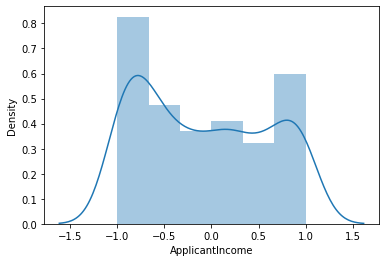

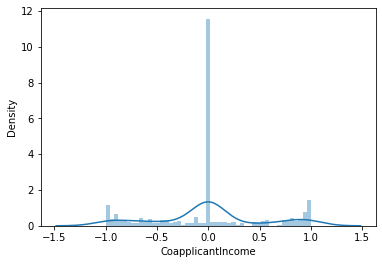

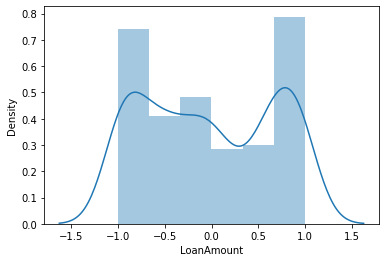

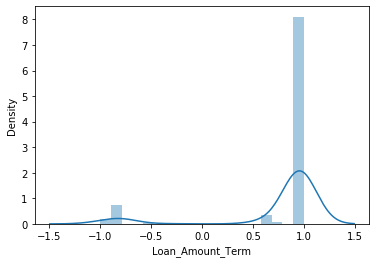

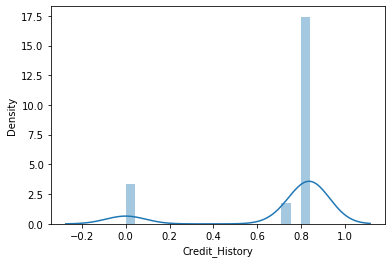

In [236]:
import warnings
warnings.filterwarnings('ignore')
for col in dataset.select_dtypes(include=np.number).columns:
    if col=='Loan_ID' or col=='Gender':
        continue
    sns.distplot(np.sin(dataset[col]))
    plt.show()

In [215]:
dataset.loc[dataset['Gender'].isna(), 'Gender']

Series([], Name: Gender, dtype: object)

In [206]:
dataset.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
dataset=pd.read_csv("loan_data.csv")
dataset.head()
dataset.shape

(381, 13)

In [62]:
X_train.shape

(342, 12)

In [16]:
dataset.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
len(dataset)

381

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [20]:
from sklearn.impute import SimpleImputer

In [68]:
X_train.iloc[:, [1,5]]

,Gender,Self_Employed
210,Male,No
165,Male,No
11,Female,No
342,Female,NaN
110,Male,No
...,...,...
338,Male,No
358,Male,No
220,Female,Yes
14,Male,No


In [70]:
imputer=SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer.fit(X_train.iloc[:, [1,5]])
X_train.iloc[:, [1,5]]=imputer.transform(X_train.iloc[:, [1,5]])

X_test.iloc[:, [1,5]]=imputer.transform(X_test.iloc[:, [1,5]])

In [71]:
X_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            8
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     10
Credit_History       26
Property_Area         0
dtype: int64

In [73]:
X_train['Dependents'].unique()

array(['1', '2', '0', '3+', nan], dtype=object)

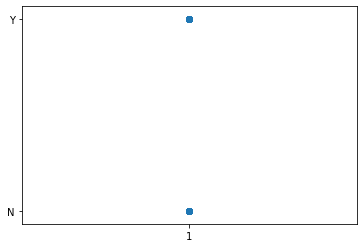

In [76]:
plt.scatter(x=dataset.loc[dataset['Dependents']=='1', "Dependents"], y=dataset.loc[dataset['Dependents']=='1', 'Loan_Status'])


In [83]:
dataset.loc[dataset[''], 'Dependents']

0       1
1       0
2       0
3       0
4       0
       ..
376    3+
377     0
378     0
379    3+
380     0
Name: Dependents, Length: 381, dtype: object

In [87]:
dataset.groupby(by='Loan_Status').count()['Dependents']

Loan_Status
N    106
Y    267
Name: Dependents, dtype: int64

In [89]:
for i, df in dataset.groupby(by='Loan_Status'):
    print(i)

N
Y


In [94]:
df1=dataset.groupby(by='Dependents')

In [112]:
for i, df in df1:
    print(i)
    #print(df['Loan_Status'])
    print(len(df.loc[df['Loan_Status']=='Y']))
    #plt.bar(i, len(df.loc['Loan_Status']))

0
168
1
35
2
44
3+
20


In [107]:
len(dataset.loc[dataset['Loan_Status']=='Y' , 'Dependents'])

271

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


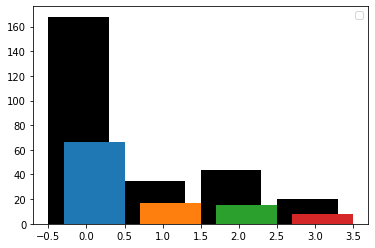

In [135]:
for n, (i, df) in enumerate(df1):
    plt.bar(x=n-0.1,height=len(df.loc[df['Loan_Status']=='Y', 'Loan_Status']), color='black')
    plt.bar(x=n+0.1,height=len(df.loc[df['Loan_Status']=='N', 'Loan_Status']))
    plt.legend()
    #plt.show()

In [116]:
dataset.count()

Loan_ID              381
Gender               376
Married              381
Dependents           373
Education            381
Self_Employed        360
ApplicantIncome      381
CoapplicantIncome    381
LoanAmount           381
Loan_Amount_Term     370
Credit_History       351
Property_Area        381
Loan_Status          381
dtype: int64

In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [137]:
dataset.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [138]:
dataset.loc[dataset['Dependents'].isna(), 'Loan_Status']

140    N
185    N
190    Y
212    Y
213    Y
222    Y
327    N
375    N
Name: Loan_Status, dtype: object

In [140]:
dataset['Dependents'].unique()
print(X_train['Dependents'].unique())
print(X_test['Dependents'].unique())

['1' '2' '0' '3+' nan]
['1' '2' '0' '3+']


In [141]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
210,LP002097,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban
165,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban
11,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban
342,LP002753,Female,No,1,Graduate,No,3652,0.0,95.0,360.0,1.0,Semiurban
110,LP001634,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural


In [144]:
imputer=SimpleImputer(strategy='most_frequent', missing_values=np.nan)


In [150]:
X_train.loc[:,['Dependents']]=imputer.fit_transform(X_train.loc[:, ['Dependents']])
X_test.loc[:,['Dependents']]=imputer.fit_transform(X_test.loc[:, ['Dependents']])

In [153]:
X_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     1
Credit_History       4
Property_Area        0
dtype: int64

In [155]:
X_train['Loan_Amount_Term'].unique()

array([360.,  60., 180.,  nan, 480.,  84., 300.,  12., 120., 240.,  36.])

In [156]:
X_train.loc[:,['Loan_Amount_Term']]=imputer.fit_transform(X_train.loc[:, ['Loan_Amount_Term']])
X_test.loc[:,['Loan_Amount_Term']]=imputer.transform(X_test.loc[:, ['Loan_Amount_Term']])

In [157]:
X_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       26
Property_Area         0
dtype: int64

In [159]:
X_train['Credit_History'].unique()

array([ 1.,  0., nan])

In [160]:
X_train.loc[:,['Credit_History']]=imputer.fit_transform(X_train.loc[:, ['Credit_History']])
X_test.loc[:,['Credit_History']]=imputer.transform(X_test.loc[:, ['Credit_History']])

In [161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 210 to 163
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            342 non-null    object 
 1   Gender             342 non-null    object 
 2   Married            342 non-null    object 
 3   Dependents         342 non-null    object 
 4   Education          342 non-null    object 
 5   Self_Employed      342 non-null    object 
 6   ApplicantIncome    342 non-null    int64  
 7   CoapplicantIncome  342 non-null    float64
 8   LoanAmount         342 non-null    float64
 9   Loan_Amount_Term   342 non-null    float64
 10  Credit_History     342 non-null    float64
 11  Property_Area      342 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 34.7+ KB


In [162]:
X_train.drop(columns=['Loan_ID'], inplace=True)
X_test.drop(columns=['Loan_ID'], inplace=True)

In [163]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [166]:
X_train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [168]:
def non_int_elements(column):
    non_num=[]

    for i in X_train[column]:
        try:
            int(i)
        except:
            non_num.append(i)
    for i in X_test[column]:
        try:
            int(i)
        except:
            non_num.append(i)
    return non_num

In [175]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 210 to 163
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             342 non-null    object 
 1   Married            342 non-null    object 
 2   Dependents         342 non-null    object 
 3   Education          342 non-null    object 
 4   Self_Employed      342 non-null    object 
 5   ApplicantIncome    342 non-null    int64  
 6   CoapplicantIncome  342 non-null    float64
 7   LoanAmount         342 non-null    float64
 8   Loan_Amount_Term   342 non-null    float64
 9   Credit_History     342 non-null    float64
 10  Property_Area      342 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 32.1+ KB


In [174]:
list(X_train.select_dtypes(exclude=np.number).columns)

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [178]:
### preprocessor

def encoder(columns):
    le=LabelEncoder()
    for col in columns:
        X_train.loc[:, col]=le.fit_transform(X_train.loc[:, col])
        X_test.loc[:, col]=le.transform(X_test.loc[:, col])


encoder(list(X_train.select_dtypes(exclude=np.number).columns))


In [180]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 155 to 67
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             39 non-null     int32  
 1   Married            39 non-null     int32  
 2   Dependents         39 non-null     int32  
 3   Education          39 non-null     int32  
 4   Self_Employed      39 non-null     int32  
 5   ApplicantIncome    39 non-null     int64  
 6   CoapplicantIncome  39 non-null     float64
 7   LoanAmount         39 non-null     float64
 8   Loan_Amount_Term   39 non-null     float64
 9   Credit_History     39 non-null     float64
 10  Property_Area      39 non-null     int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 2.7 KB


In [184]:
def col_process (col):
    X_train['total_income']=X_train[col[0]]+X_train[col[1]]
    X_test['total_income']=X_test[col[0]]+X_test[col[1]]
    X_train.drop(columns=col, inplace=True)
    X_test.drop(columns=col, inplace=True)

col_process(['ApplicantIncome', 'CoapplicantIncome'])

In [187]:
le=LabelEncoder()
Y_train=le.fit_transform(Y_train)
Y_test=le.transform(Y_test)

In [188]:
### Model training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
lr=LogisticRegression()

lr.fit(X_train, Y_train)

y_pred=lr.predict(X_test)

print(confusion_matrix(Y_test, y_pred=y_pred))
print(accuracy_score(Y_test, y_pred=y_pred))
print(f1_score(Y_test, y_pred=y_pred))

[[ 4 11]
 [ 0 24]]
0.717948717948718
0.8135593220338984


c:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [194]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=250, class_weight={0:1.25,1:1})
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

print(confusion_matrix(Y_test, y_pred=y_pred))
print(accuracy_score(Y_test, y_pred=y_pred))
print(f1_score(Y_test, y_pred=y_pred))

[[ 4 11]
 [ 1 23]]
0.6923076923076923
0.7931034482758621


In [195]:
from xgboost import XGBClassifier

x_clf=XGBClassifier()

x_clf.fit(X_train, Y_train)
y_pred=x_clf.predict(X_test)

print(confusion_matrix(Y_test, y_pred=y_pred))
print(accuracy_score(Y_test, y_pred=y_pred))
print(f1_score(Y_test, y_pred=y_pred))

[[ 8  7]
 [ 4 20]]
0.717948717948718
0.7843137254901961


In [197]:
import sys

print(sys.path)

['e:\\End to End ML projects\\1st ML project\\experiment', 'c:\\Users\\vishal\\anaconda3\\python37.zip', 'c:\\Users\\vishal\\anaconda3\\DLLs', 'c:\\Users\\vishal\\anaconda3\\lib', 'c:\\Users\\vishal\\anaconda3', '', 'c:\\Users\\vishal\\anaconda3\\lib\\site-packages', 'c:\\Users\\vishal\\anaconda3\\lib\\site-packages\\win32', 'c:\\Users\\vishal\\anaconda3\\lib\\site-packages\\win32\\lib', 'c:\\Users\\vishal\\anaconda3\\lib\\site-packages\\Pythonwin', 'c:\\Users\\vishal\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\vishal\\.ipython']


In [237]:
from sklearn.model_selection import GridSearchCV

lr

In [238]:
param_grid={'penalty':['l1', 'l2'], 'solver': ['lbfgs', 'liblinear', 'sag'], 'max_iter':[100, 200, 300]}

regressor_grid=GridSearchCV(param_grid=param_grid, estimator=LogisticRegression(), cv=5, return_train_score=True)

In [239]:
regressor_model=regressor_grid.fit(X_train, Y_train)

print(regressor_model)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag']},
             return_train_score=True)


In [242]:
f1_score(Y_test,regressor_model.predict(X_test))

0.8135593220338984

In [243]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
import os

if os.path.isdir("../experiment"):
    print("true")

true


In [8]:
import pandas as pd
dataset=pd.read_csv('loan_data.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [9]:
import pickle



pickle.load()

TypeError: file must have 'read' and 'readline' attributes

In [10]:
os.getcwd()

'e:\\End to End ML projects\\1st ML project\\experiment'

In [11]:
os.chdir('..')

In [13]:
os.getcwd()

'e:\\End to End ML projects\\1st ML project'

In [14]:
os.chdir(os.curdir)

In [15]:
os.getcwd()

'e:\\End to End ML projects\\1st ML project'

In [19]:
os.chdir(os.curdir+"/experiment")


In [21]:
os.getcwd()

'e:\\End to End ML projects\\1st ML project\\experiment'

In [ ]:
pickle.load()

ModuleNotFoundError: No module named 'mlflow'

In [23]:
test=pd.read_csv("loan_data.csv")

In [24]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [46]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le.fit_transform(test['Property_Area'])

print(le.classes_)
le.transform([le.classes_[0]])

['Rural' 'Semiurban' 'Urban']


array([0])

In [8]:
import pandas as pd
import numpy as np
dataset=pd.read_csv(r'E:\End to End ML projects\1st ML project\experiment\loan_data.csv')

dataset.select_dtypes(exclude=np.number).columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [36]:
le.transform([le.classes_[0]])

array([0])

In [47]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [48]:
dataset['Loan_Status'].value_counts(normalize=True)

Y    0.711286
N    0.288714
Name: Loan_Status, dtype: float64

In [54]:
type(dataset.isnull().sum()>0)

pandas.core.series.Series

In [62]:
temp=dataset.isnull().sum()>0

temp[temp].index

Index(['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [63]:
dataset.select_dtypes(include=np.number)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [91]:
dataset=pd.read_csv('loan_data.csv')

temp=dataset.isnull().sum()

temp[temp>0]

null_cols=temp[temp>0].index

categorical_cols=list(dataset.select_dtypes(exclude=np.number))

numerical_cols=list(dataset.select_dtypes(include=np.number))

for name in null_cols:
    if name in categorical_cols:
        print(f"the col {name} requires mode impuation")
        dataset[name].fillna(dataset[name].mode()[0], inplace=True)
    else:
        print(f"the col {name} requires mean impuation")
        dataset[name].fillna(dataset[name].mean(), inplace=True)

temp=dataset.isnull().sum()

if temp.sum()==0:
    print("All missing values handled")

        

the col Gender requires mode impuation
the col Dependents requires mode impuation
the col Self_Employed requires mode impuation
the col Loan_Amount_Term requires mean impuation
the col Credit_History requires mean impuation
All missing values handled


In [92]:
temp

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [90]:
dataset.loc[dataset['Gender'].isna(), 'Gender']

Series([], Name: Gender, dtype: object)

In [78]:
for i in ['Loan_Amount_Term', 'Credit_History']:
    temp=[]
    for entry in dataset[i]:
        try:
            (float(entry))
        
        except:
            temp.append(entry)

    print(f"The non numeric entry were {temp}")

The non numeric entry were ['mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean']
The non numeric entry were ['mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean']


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# fig, ax =plt.

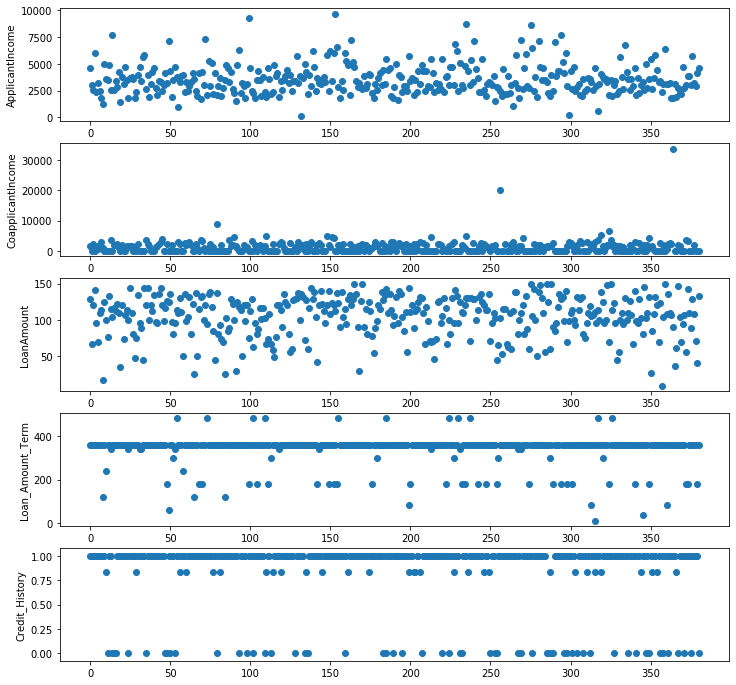

In [104]:
fig, ax=plt.subplots(nrows=5, ncols=1, figsize=(12,12))

for i in range(5):
    ax[i].scatter(x=range(len(dataset)), y=dataset[numerical_cols[i]])
    ax[i].set_ylabel(numerical_cols[i])

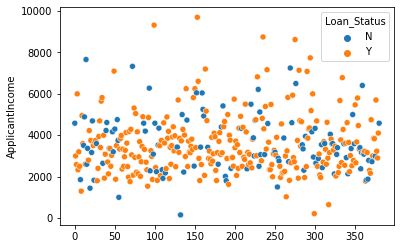

In [105]:
sns.scatterplot(x=range(len(dataset)), y=dataset['ApplicantIncome'], hue=dataset['Loan_Status'])

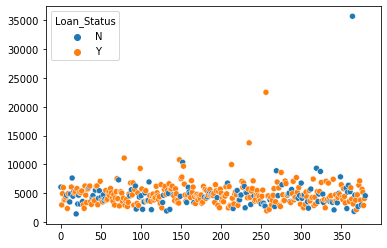

In [106]:
total_income=dataset['ApplicantIncome']+dataset['CoapplicantIncome']

sns.scatterplot(x=range(len(dataset)), y=total_income, hue=dataset['Loan_Status'])

In [110]:
def capping(dataset,col):
    dataset.loc[dataset[col]> np.quantile(dataset[col], 0.99), col]=np.quantile(dataset[col], 0.99)
    return dataset

In [158]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def data_split(dataset, target, size=0.2, stratify=None):
    Xtrain, Xtest, Ytrain, Ytest= train_test_split(dataset,target, test_size=0.2)
    return Xtrain, Xtest, Ytrain, Ytest


def scaling(Xtrain, Xtest, col_list):
    scaler=StandardScaler()
    for col in col_list:
        Xtrain[col]=scaler.fit_transform(Xtrain[[col]])
        Xtest[col]=scaler.transform(Xtest[[col]])

    return Xtrain, Xtest 

def encoder(Xtrain, Xtest, col_list):
    for col in col_list:
        le=LabelEncoder()
        Xtrain[col]=le.fit_transform(Xtrain[col])
        Xtest[col]=le.transform(X_test[col])

    return Xtrain, Xtest



In [159]:
def data_imputation(dataset):
    ## check if there are missing values in any col and which category does it belong to
    temp=dataset.isnull().sum()

    temp[temp>0]

    null_cols=temp[temp>0].index

    categorical_cols=list(dataset.select_dtypes(exclude=np.number))

    numerical_cols=list(dataset.select_dtypes(include=np.number))

    for name in null_cols:
        if name in categorical_cols:
            print(f"the col {name} requires mode impuation")
            dataset[name].fillna(dataset[name].mode()[0], inplace=True)
        else:
            print(f"the col {name} requires mean impuation")
            dataset[name].fillna(dataset[name].mean(), inplace=True)

    temp=dataset.isnull().sum()

    if temp.sum()==0:
        print("All missing values handled")
    
    return dataset

In [204]:
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

def data_loader():
    df=pd.read_csv(r"E:\End to End ML projects\1st ML project\experiment\loan_data.csv")
    return df


def model_training():
    dataset=data_loader()
    dataset=data_imputation(dataset=dataset)
    dataset.drop(columns=['Loan_ID'], inplace=True)

    X=dataset.iloc[:,:-1]
    Y=dataset.iloc[:,-1]
    ## Splitting dataset
    Xtrain, Xtest, Ytrain, Ytest=data_split(X, Y)

    print("Splitting finished")

    
    Xtrain, Xtest=scaling(Xtrain=Xtrain, Xtest=Xtest, col_list=numerical_cols)
    print("Scaling for the dataset has been done")
    # Xtrain, Xtest=encoder(Xtrain=Xtrain, Xtest=Xtest, col_list=categorical_cols)
    for col in categorical_cols:
        le=LabelEncoder()
        Xtrain[col]=le.fit_transform(Xtrain[col])
        Xtest[col]=le.transform(Xtest[col])
    print("Encoding has been concluded")

    ## resampling

    ros=RandomOverSampler()
    x,y=ros.fit_resample(Xtrain, Ytrain)

    le2=LabelEncoder()
    y=le2.fit_transform(y)

    Ytest=le2.transform(Ytest)

    ### grid search cv on logistic regression

    #param_grid={'penalty':['l1', 'l2'], 'solver': ['liblinear', 'sag'], 'max_iter':[100, 200, 300]}

    #param_grid2={'n_estimators':[200, 150, 225], 'criterion':['gini'], 'max_depth':[7,6,5]}

    #regressor_grid=GridSearchCV(param_grid=param_grid2, estimator=RandomForestClassifier(), cv=5, return_train_score=True)
    #regressor_model=regressor_grid.fit(x, y)


    clf_xgb=XGBClassifier()

    clf_xgb.fit(x,y)

    with open("model_test_xgb.pkl", 'wb') as f:
        pickle.dump(clf_xgb,f)

    print("The model has been successfully trained and saved")

    ## model accuracy

    ypred=clf_xgb.predict(Xtest)
    print(confusion_matrix(Ytest, ypred))
    

In [205]:
model_training()

the col Gender requires mode impuation
the col Dependents requires mode impuation
the col Self_Employed requires mode impuation
the col Loan_Amount_Term requires mean impuation
the col Credit_History requires mean impuation
All missing values handled
Splitting finished
Scaling for the dataset has been done
Encoding has been concluded
The model has been successfully trained and saved
[[13 10]
 [ 3 51]]


In [195]:
from xgboost import XGBClassifier

In [146]:
categorical_cols.remove('Loan_ID')

In [2]:
categorical_cols

NameError: name 'categorical_cols' is not defined

In [123]:
dataset=pd.read_csv(r"E:\End to End ML projects\1st ML project\experiment\loan_data.csv")

X=dataset.drop(columns=['Loan_ID'])
Y=dataset["Loan_Status"]

In [124]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

In [125]:
Y_train.value_counts()

Y    225
N     79
Name: Loan_Status, dtype: int64

In [126]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

ros=RandomOverSampler()
x,y=ros.fit_resample(X_train, Y_train)

In [128]:
y.value_counts()

Y    225
N    225
Name: Loan_Status, dtype: int64

In [133]:
from sklearn.metrics import accuracy_score

In [151]:
dataset[dataset['Loan_Status'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [174]:
dataset=data_loader()
dataset=data_imputation(dataset=dataset)
dataset.drop(columns=['Loan_ID'], inplace=True)

X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]
## Splitting dataset
Xtrain, Xtest, Ytrain, Ytest=data_split(X, Y)

print("Splitting finished")


Xtrain, Xtest=scaling(Xtrain=Xtrain, Xtest=Xtest, col_list=numerical_cols)
print("Scaling for the dataset has been done")

the col Gender requires mode impuation
the col Dependents requires mode impuation
the col Self_Employed requires mode impuation
the col Loan_Amount_Term requires mean impuation
the col Credit_History requires mean impuation
All missing values handled
Splitting finished
Scaling for the dataset has been done


In [169]:
categorical_cols.pop()

'Loan_Status'

In [175]:
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [176]:
for col in categorical_cols:
    le=LabelEncoder()
    Xtrain[col]=le.fit_transform(Xtrain[col])
    Xtest[col]=le.transform(Xtest[col])

In [177]:
Xtrain

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
18,1,1,2,1,0,0.476813,-0.119577,0.198822,0.291296,0.456339,2
38,0,0,0,0,0,-0.312346,-0.527755,0.556044,0.291296,0.456339,1
257,0,0,0,1,0,-1.089736,-0.527755,-1.837342,0.291296,0.456339,1
261,0,0,1,1,1,0.228297,-0.527755,-1.515842,0.291296,0.456339,1
265,1,1,0,0,0,-0.201587,0.028388,1.199043,0.291296,0.456339,1
...,...,...,...,...,...,...,...,...,...,...,...
311,1,0,0,1,0,0.106462,-0.527755,0.198822,0.291296,0.456339,0
332,1,1,0,0,0,0.164611,-0.527755,0.198822,0.291296,0.456339,1
54,1,0,0,0,0,0.147305,-0.527755,0.305989,2.127177,0.456339,2
352,1,1,2,1,0,0.095386,-0.432775,0.127378,0.291296,0.456339,1


In [186]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 18 to 190
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             304 non-null    int32  
 1   Married            304 non-null    int32  
 2   Dependents         304 non-null    int32  
 3   Education          304 non-null    int32  
 4   Self_Employed      304 non-null    int32  
 5   ApplicantIncome    304 non-null    float64
 6   CoapplicantIncome  304 non-null    float64
 7   LoanAmount         304 non-null    float64
 8   Loan_Amount_Term   304 non-null    float64
 9   Credit_History     304 non-null    float64
 10  Property_Area      304 non-null    int32  
dtypes: float64(5), int32(6)
memory usage: 21.4 KB


In [1]:
import pathlib, os

In [6]:
pathlib.Path('mlrus')

WindowsPath('mlrus')

In [9]:
import sample

hello 


In [12]:
sample.__file__

'e:\\End to End ML projects\\1st ML project\\experiment\\sample.py'

In [20]:
pathlib.Path("experiment")

WindowsPath('.')

In [22]:
os.path.join(pathlib.Path('packaging_test', os.getcwd()))

'e:\\End to End ML projects\\1st ML project\\experiment'

In [23]:
os.getcwd()

'e:\\End to End ML projects\\1st ML project\\experiment'

In [ ]:
1. store_counts=store_types['type'].value_counts()
2. store_props=store_counts/store_counts.sum()
3. dept_counts_sorted=store_depts['department'].value_counts().sort_values(ascending=False)
4. dept_props_sorted=dept_counts_sorted/dept_counts_sorted.sum()

In [26]:
import pandas as pd
dataset=pd.read_csv("loan_data.csv")

In [31]:
dataset['Loan_Status'].value_counts(sort=True)

Y    271
N    110
Name: Loan_Status, dtype: int64

In [30]:
dataset['Loan_Status'].value_counts().sort_values(ascending=False)

Y    271
N    110
Name: Loan_Status, dtype: int64

In [28]:
dataset['Loan_Status'].value_counts()/dataset['Loan_Status'].value_counts().sum()

Y    0.711286
N    0.288714
Name: Loan_Status, dtype: float64

In [29]:
dataset['Loan_Status'].value_counts(normalize=True)

Y    0.711286
N    0.288714
Name: Loan_Status, dtype: float64

In [37]:
a=dataset['Education'].sort_values(ascending=True).unique()

In [36]:
dataset['Education'].value_counts(sort=True).index

Index(['Graduate', 'Not Graduate'], dtype='object')

In [39]:
for i, k in enumerate(a,0):
    print(i)
    print(k)

0
Graduate
1
Not Graduate
